# Edit Spectra

In this example a spectrum is loaded from an ism file. The data is then processed and partially saved again.

In [1]:
from zahner_analysis.file_import.ism_import import IsmImport
from zahner_analysis.plotting.impedance_plot import bodePlotter
import matplotlib.pyplot as plt
from zahner_analysis.file_export.ism_export import IsmExport
import numpy as np

# Import the data

The [IsmImport](https://doc.zahner.de/zahner_analysis/file_import/index.html#zahner_analysis.file_import.ism_import.IsmImport) class is used to import the data into Python.

Then the arrays are read with the getters and the arrays are displayed.

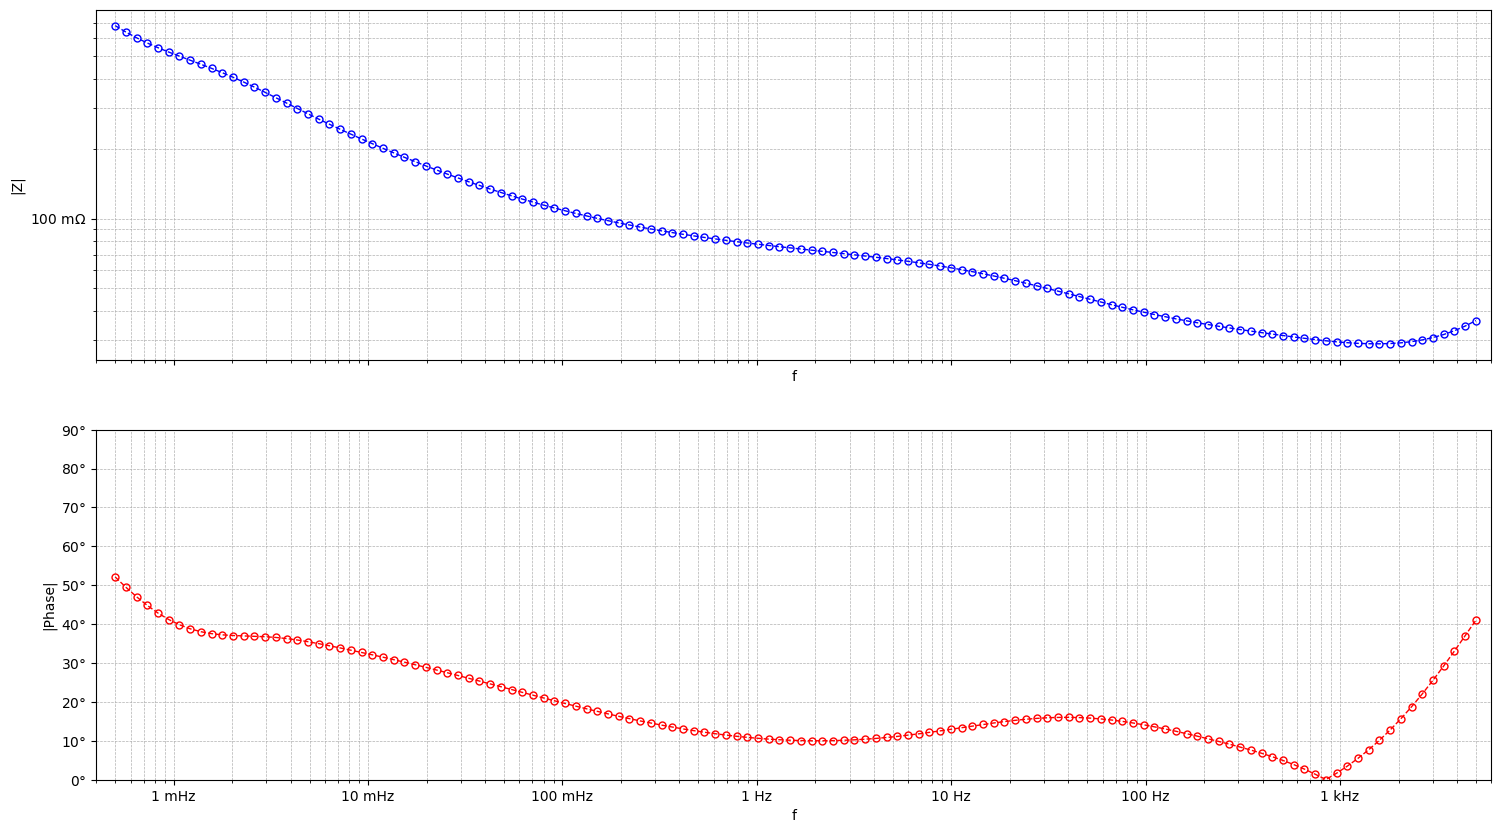

In [2]:
impedanceData = IsmImport("li-ion-battery.ism")

frequencies = impedanceData.getFrequencyArray()
impedanceAbsolut = impedanceData.getImpedanceArray()
phase = impedanceData.getPhaseArray()

(fig1, (impedanceAxis1, phaseAxis1)) = bodePlotter(
    frequencies=frequencies,
    impedanceAbsolute=impedanceAbsolut,
    phase=phase,
    zTogetherPhase=False)
fig1.set_size_inches(18, 10)
plt.show()

# Edit the data

As an example, all frequencies above 1 kHz are deleted.

And just to show it, without making any sense, the impedance and the phase are changed.

Values at array indexes can also be easily edited. Or new values can be added.

In [3]:
maxFrequency = 1000
try:
    index = next(i for i, freq in enumerate(frequencies) if freq > maxFrequency)
except:
    index = len(frequencies)

frequenciesEdit = frequencies[:index]
impedanceAbsolutEdit = impedanceAbsolut[:index] * 2.0
impedanceAbsolutEdit = np.clip(impedanceAbsolutEdit, 0.08, 1)
phaseEdit = phase[:index] * 1.2

impedanceAbsolutEdit[5] = 4
impedanceAbsolutEdit[10] = 2

frequenciesEdit = np.insert(frequenciesEdit, 0, 10e-6)
impedanceAbsolutEdit = np.insert(impedanceAbsolutEdit, 0, impedanceAbsolutEdit[0])
phaseEdit = np.insert(phaseEdit, 0, phaseEdit[0])

# Plotting the changed data

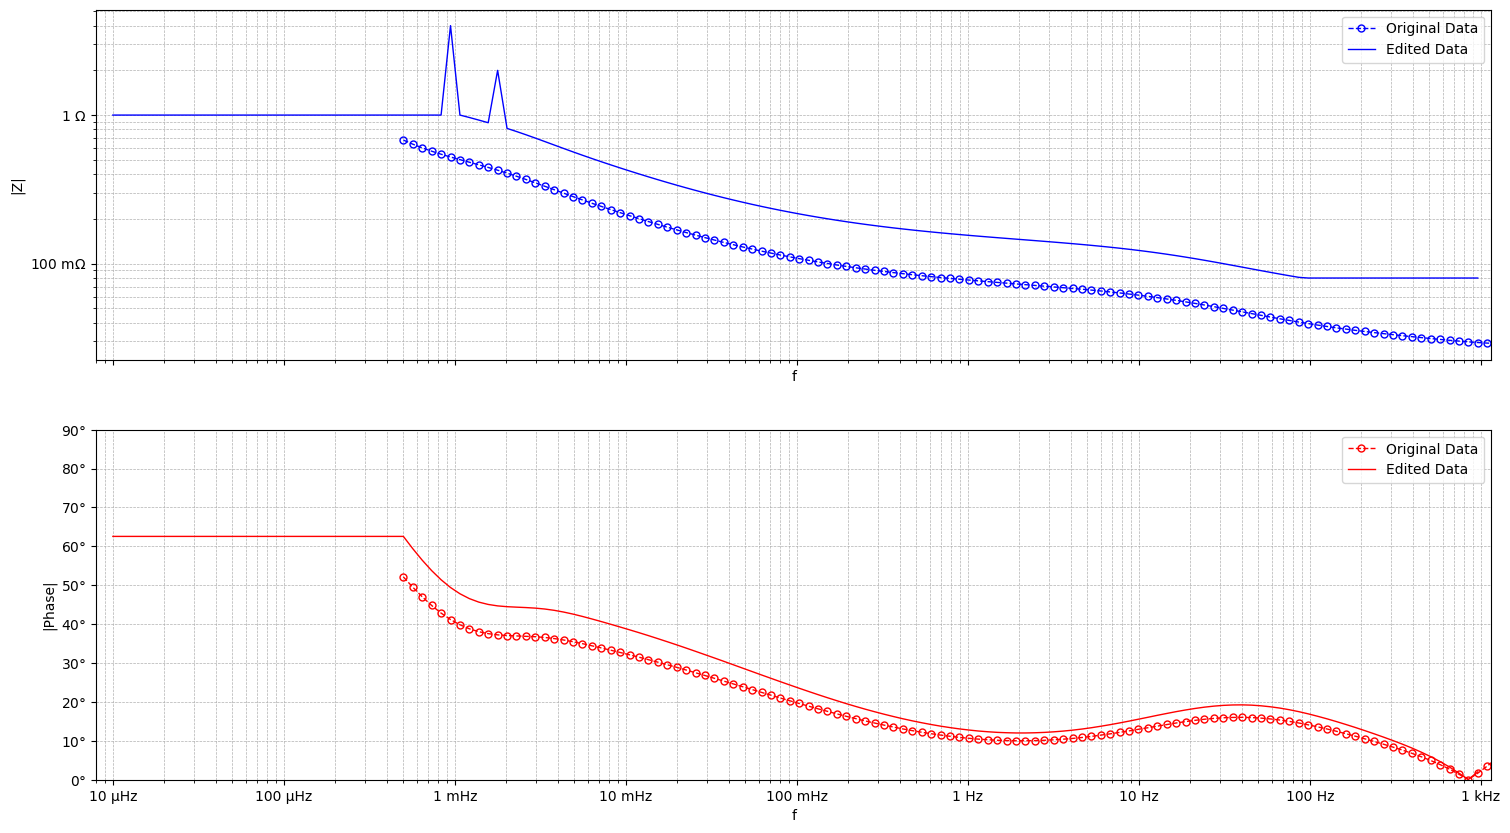

In [4]:
(fig2, (impedanceAxis1, phaseAxis1)) = bodePlotter(
    frequencies=frequencies,
    impedanceAbsolute=impedanceAbsolut,
    phase=phase,
    zTogetherPhase=False)
(fig2, (impedanceAxis2, phaseAxis2)) = bodePlotter(
    axes=(impedanceAxis1, phaseAxis1),
    frequencies=frequenciesEdit,
    impedanceAbsolute=impedanceAbsolutEdit,
    phase=phaseEdit,
    zTogetherPhase=False,
    argsImpedanceAxis={"linestyle": "solid", "marker": None},
    argsPhaseAxis={"linestyle": "solid", "marker": None})

impedanceAxis2.legend(["Original Data", "Edited Data"])
phaseAxis2.legend(["Original Data", "Edited Data"])

fig2.set_size_inches(18, 10)
plt.show()

# Export the data

The data can then be exported to an ism file using the [IsmExport](https://doc.zahner.de/zahner_analysis/file_export/index.html#zahner_analysis.file_export.ism_export.IsmExport) class.

**When exporting, only the spectrum with frequency and impedance are exported - all other information is lost.**

This means that all parameters are lost, as well as DC and ACQ data. The file can no longer be used as a template in Thales and can no longer be opened in Thales.
It is recommended to always save the original file.

In [5]:

exportFile = IsmExport(
    frequency=frequenciesEdit,
    impedance=impedanceAbsolutEdit,
    phase=phaseEdit,
    system_string=impedanceData.system,
    potential_string=impedanceData.potential,
    current_string=impedanceData.current,
    metaData=impedanceData.getMetaData(),
)
exportFile.writeToFile("li-ion-battery-edited.ism")